#### 텍스트처리
- 전처리 
    - 숫자, 문장부호, 특수문자: 불용어 처리
- 정수인코딩
    - 텍스트를 숫자로 바꾸는 작업을 먼저 해야 함

- ex) 기상청은 이날 오전 11시 브리핑에서 제5호 태풍
    - x                         y
      기상청은 이날 오전        11시
      이날 오전 11시            브리핑에서
      오전 11시 브리핑에서      제5호

    - input hidden output

### EX) 승객수 예측

In [1]:
import pandas as pd
df = pd.read_csv('Data/passengers.csv', index_col='Month')
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [2]:
df.shape

(144, 1)

<Axes: xlabel='Month'>

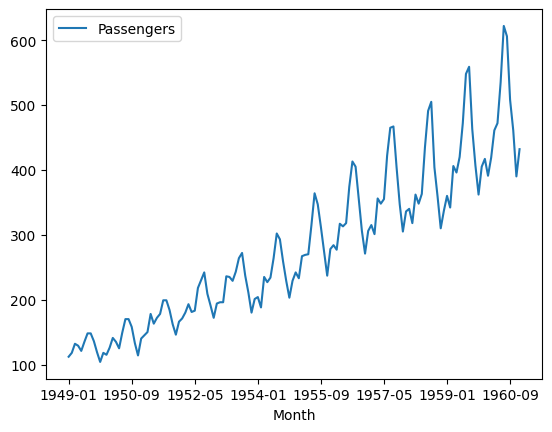

In [3]:
df.plot()

In [4]:
df.sort_index(inplace = True)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [8]:
data = df.astype('float32')

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled)*0.8)
test_size = len(data_scaled) - train_size
len(data_scaled), train_size, test_size

(144, 115, 29)

In [12]:
train = data_scaled[0:train_size, :]
test = data_scaled[train_size:, :]
len(train), len(test)

(115, 29)

In [13]:
import numpy as np
def create_dataset(dataset, timestep):
    print(len(dataset), timestep)
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]
        b = dataset[i+timestep, 0]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [41]:
timestep = 2
X_train, y_train = create_dataset(train, timestep)
X_test, y_test = create_dataset(test, timestep)
X_train[:5]

115 2
29 2


array([[0.01544401, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984557]], dtype=float32)

In [42]:
X_train.shape

(112, 2)

In [43]:
train[:5]

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]], dtype=float32)

In [44]:
train[:5, 0]

array([0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853],
      dtype=float32)

In [45]:
len(train)-1-1, train[0:1, 0]

(113, array([0.01544401], dtype=float32))

In [46]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape     # X_train.shape: (112, 2, 1) 샘플수, 타입스텝, 변수개수

((112, 2, 1), (26, 2, 1))

In [57]:
X_train[:5]

array([[[0.01544401],
        [0.02702703]],

       [[0.02702703],
        [0.05405405]],

       [[0.05405405],
        [0.04826255]],

       [[0.04826255],
        [0.03281853]],

       [[0.03281853],
        [0.05984557]]], dtype=float32)

In [47]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(units = 20, input_shape=(timestep, 1)))
                                # X_train.shape: (112, 2, 1) 샘플수, 타입스텝, 변수개수
                                # input_shape = (타입스텝, 변수개수)
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer= 'sgd', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 17ms/step - loss: 0.0466
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0266
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0114
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 13/100
4/4 [==============================] - 0s 6ms

In [49]:
from sklearn.metrics import mean_squared_error
trainPred = model.predict(X_train)
testPred = model.predict(X_test)

trainPred = scaler.inverse_transform(trainPred)
y_train_inv = scaler.inverse_transform([y_train])
testPred = scaler.inverse_transform(testPred)
y_test_inv = scaler.inverse_transform([y_test])
y_train_inv[:5]   # 데이터 스케일링 이전으로 복구할 경우, 아주 작지만 정보손실이 있음

1/1 [==============================] - 0s 22ms/step


array([[131.99999879, 129.00000163, 120.99999632, 135.00000368,
        147.99999397, 147.99999397, 136.00000531, 119.00000078,
        103.99999952, 117.99999916, 115.00000199, 125.99999674,
        140.99999801, 135.00000368, 125.00000283, 148.9999956 ,
        169.99999891, 169.99999891, 157.99999481, 133.00000042,
        114.00000036, 139.99999638, 145.00000452, 149.99999723,
        177.9999965 , 163.00000295, 172.00000217, 177.9999965 ,
        198.99999982, 198.99999982, 184.00000627, 162.00000133,
        146.00000615, 165.9999924 , 171.00000054, 179.99999976,
        193.00000549, 181.00000139, 183.00000464, 217.99999988,
        230.00000398, 241.99999264, 209.00000066, 191.00000223,
        172.00000217, 194.00000712, 195.99999493, 195.99999493,
        235.99999831, 234.99999668, 229.00000235, 242.99999427,
        263.99999759, 272.00001061, 236.99999994, 211.00000392,
        179.99999976, 201.00000308, 203.99999252, 187.99999735,
        234.99999668, 226.9999991 , 233.

In [50]:
trainScore = np.sqrt(mean_squared_error(y_train_inv[0], trainPred[:,0]))
testScore = np.sqrt(mean_squared_error(y_test_inv[0], testPred[:,0]))
trainScore, testScore

(30.756785937433314, 79.31796537397402)

In [51]:
np.empty_like(data)

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [53]:
from matplotlib import pyplot as plt 
trainPredPlot = np.empty_like(data)
trainPredPlot[:,:] = np.nan
trainPredPlot[timestep:len(trainPred)+timestep, :] = trainPred

testPredPlot = np.empty_like(data_scaled)
testPredPlot[:,:] = np.nan
testPredPlot[len(trainPred)+(timestep*2)+1:len(data_scaled)-1, :] = testPred

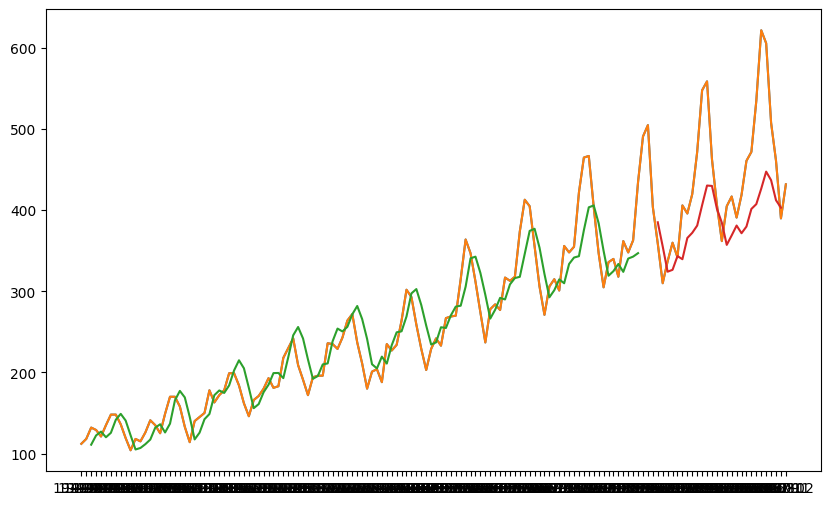

In [58]:
plt.figure(figsize = (10,6))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(data)
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()   # 추세는 반영했으나 오차가 커 보임